<a href="https://colab.research.google.com/github/ziishanahmad/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns  # For statistical data visualization
from sklearn.datasets import fetch_california_housing  # For loading the California Housing dataset
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # For building the linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation


In [3]:
# Fetch the California Housing dataset
housing = fetch_california_housing()

# Convert the dataset into a pandas DataFrame for easier manipulation and analysis
# 'data' contains the feature values and 'target' contains the target values (house prices)
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['PRICE'] = housing.target  # Add the target values as a new column 'PRICE'

# Display the first few rows of the DataFrame to understand its structure
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


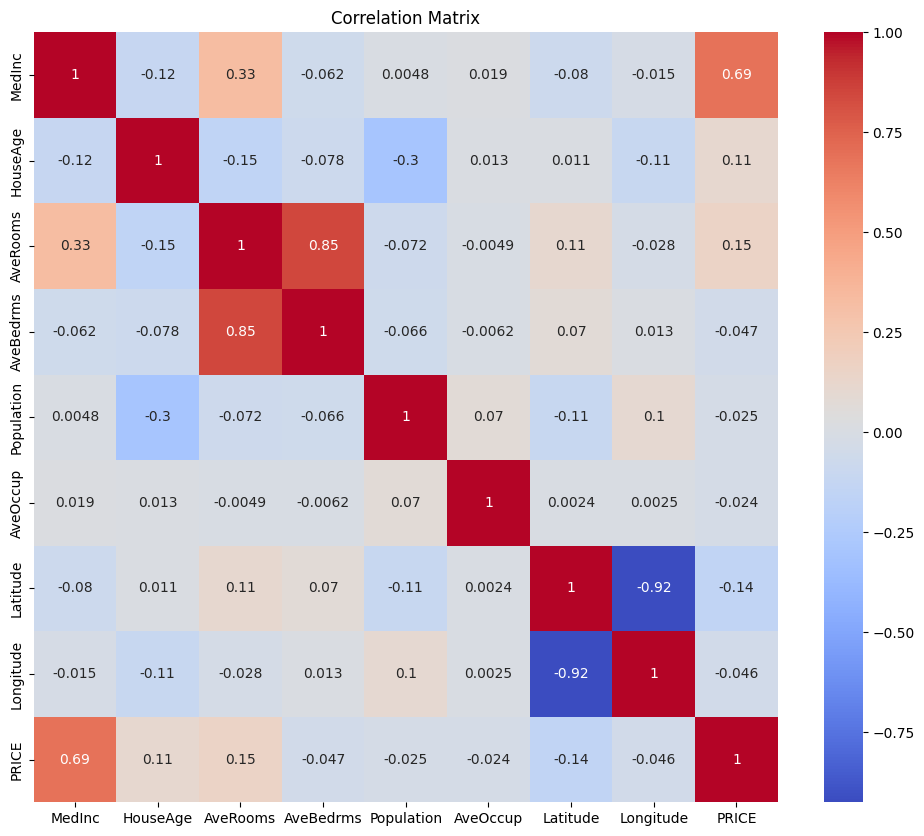

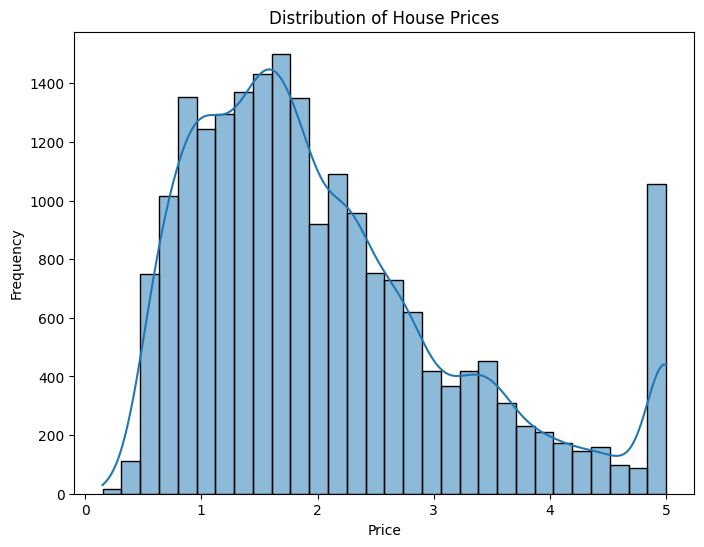

In [4]:
# Display the summary statistics of the dataset to understand its distribution
housing_df.describe()

# Visualize the correlation between different features and the target variable 'PRICE'
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')  # Create a heatmap to show correlations
plt.title('Correlation Matrix')  # Set the title of the heatmap
plt.show()  # Display the heatmap

# Visualize the distribution of the target variable 'PRICE'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(housing_df['PRICE'], bins=30, kde=True)  # Create a histogram with a kernel density estimate (KDE) line
plt.title('Distribution of House Prices')  # Set the title of the plot
plt.xlabel('Price')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot


In [5]:
# Split the dataset into features (X) and target (y)
X = housing_df.drop('PRICE', axis=1)  # Features are all columns except 'PRICE'
y = housing_df['PRICE']  # Target is the 'PRICE' column

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% for training
# random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values to have zero mean and unit variance
# This helps improve the performance of the regression model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler


In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.56
R-squared: 0.58


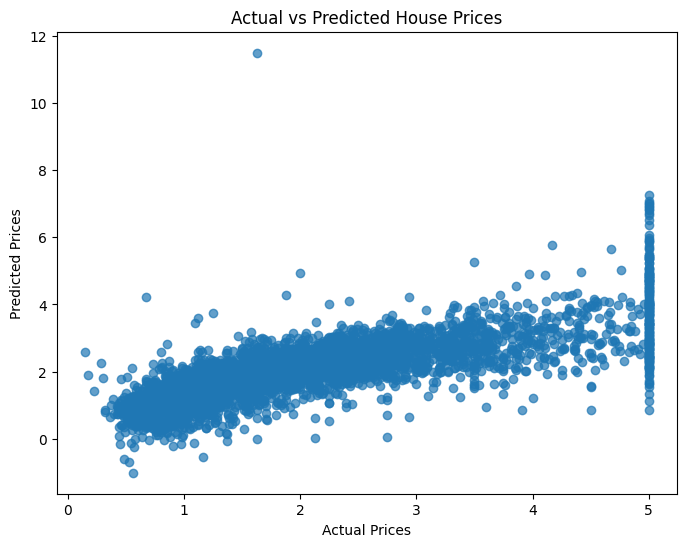

In [7]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and the R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)  # MSE measures the average squared difference between the actual and predicted values
r2 = r2_score(y_test, y_pred)  # R2 score measures how well the model explains the variance in the target variable

# Print the MSE and R2 score
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the actual vs predicted house prices
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(y_test, y_pred, alpha=0.7)  # Create a scatter plot of actual vs predicted prices
plt.xlabel('Actual Prices')  # Set the label for the x-axis
plt.ylabel('Predicted Prices')  # Set the label for the y-axis
plt.title('Actual vs Predicted House Prices')  # Set the title of the plot
plt.show()  # Display the plot
